# Store sales anomlies

In [13]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('../../data/weekly_sales.csv', parse_dates=['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)
df.head()

,sales
InvoiceDate,
2010-12-05,2630.31
2010-12-12,2822.51
2010-12-19,2886.73
2010-12-26,417.52
2011-01-02,0.00


<AxesSubplot:xlabel='InvoiceDate'>

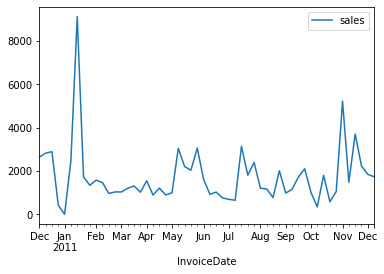

In [24]:
df.plot()

In [29]:
anomaly_detector = IsolationForest(contamination=.1)
anomaly_detector

IsolationForest(contamination=0.1)

In [30]:
anomaly_detector.fit(df_store.values)

IsolationForest(contamination=0.1)

In [32]:
df_store.loc[:,'anomalies'] = anomaly_detector.predict(df_store.values)
df_store

,sales,anomalies
InvoiceDate,,
2010-12-05,2636.38,1
2010-12-12,3013.01,1
2010-12-19,2939.45,1
2010-12-26,490.12,-1
2011-01-02,0.00,-1
2011-01-09,2575.81,1
2011-01-16,9263.86,-1
2011-01-23,1766.55,1
2011-01-30,1497.35,1


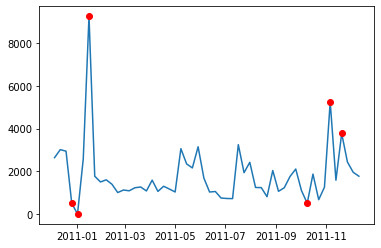

In [36]:
plt.plot(df_store.sales)
df_anomaly = df_store.query('anomalies==-1')
plt.plot(df_anomaly.sales, 'or')
plt.savefig(f'sales.png')